In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import load_img
import pathlib
from keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
%cd /content/drive/MyDrive/kaggle/

/content/drive/MyDrive/kaggle


In [4]:
!kaggle datasets download -d muratkokludataset/grapevine-leaves-image-dataset

100% 109M/109M [00:06<00:00, 23.1MB/s]
100% 109M/109M [00:06<00:00, 18.9MB/s]


In [5]:
%ls

Grapevine_Leaves_Image_Dataset/     kaggle.json
grapevine-leaves-image-dataset.zip


In [6]:
!kaggle datasets download -d muratkokludataset/grapevine-leaves-image-dataset --unzip --force

 99% 108M/109M [00:05<00:00, 22.4MB/s]
100% 109M/109M [00:06<00:00, 18.9MB/s]


In [7]:
%ls

Grapevine_Leaves_Image_Dataset/  kaggle.json


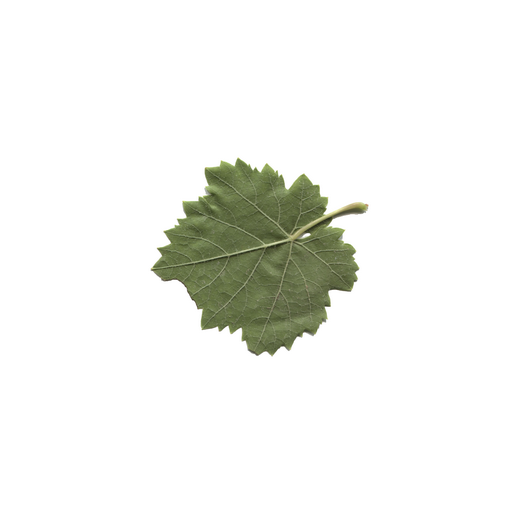

In [8]:
image=load_img('/content/drive/MyDrive/kaggle/Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png')
image

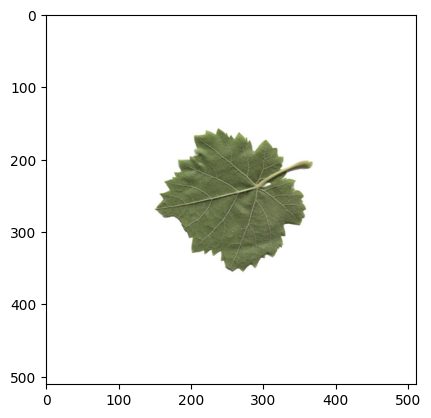

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image,cmap=plt.cm.binary)
plt.show()

In [27]:
path=('/content/drive/MyDrive/kaggle/Grapevine_Leaves_Image_Dataset')

In [11]:
path

'/content/drive/MyDrive/kaggle/Grapevine_Leaves_Image_Dataset'

In [12]:
data_dir=pathlib.Path('Grapevine_Leaves_Image_Dataset')

In [13]:
data_dir

PosixPath('Grapevine_Leaves_Image_Dataset')

In [28]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(path,validation_split=0.2,subset="training" ,seed=123,label_mode='categorical',image_size=(200, 200), batch_size=32)


Found 500 files belonging to 5 classes.
Using 400 files for training.


In [29]:
from tensorflow.keras.utils import image_dataset_from_directory
validation_dataset = image_dataset_from_directory(path,validation_split=0.2,subset="validation" ,seed=123,label_mode='categorical',image_size=(200, 200), batch_size=32)

Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [30]:
class_names=train_dataset.class_names
class_names

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

In [31]:
model=Sequential()

In [32]:
pretrained_model=keras.applications.resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(200,200,3),
    pooling='avg',
    classes=5,
)
for layers in pretrained_model.layers:
  layers.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5,activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 23719173 (90.48 MB)
Trainable params: 131461 (513.52 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [34]:
model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
 metrics=["accuracy"])

In [35]:

history=model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30
)

Epoch 1/30
13/13 [==============================] - 10s 311ms/step - loss: 0.5395 - accuracy: 0.3175 - val_loss: 0.4388 - val_accuracy: 0.4800
Epoch 2/30
13/13 [==============================] - 4s 177ms/step - loss: 0.4214 - accuracy: 0.4900 - val_loss: 0.4227 - val_accuracy: 0.3800
Epoch 3/30
13/13 [==============================] - 4s 177ms/step - loss: 0.3919 - accuracy: 0.5200 - val_loss: 0.4120 - val_accuracy: 0.4800
Epoch 4/30
13/13 [==============================] - 5s 262ms/step - loss: 0.3519 - accuracy: 0.6375 - val_loss: 0.4098 - val_accuracy: 0.4500
Epoch 5/30
13/13 [==============================] - 4s 173ms/step - loss: 0.3380 - accuracy: 0.6500 - val_loss: 0.3977 - val_accuracy: 0.5400
Epoch 6/30
13/13 [==============================] - 4s 177ms/step - loss: 0.3222 - accuracy: 0.6600 - val_loss: 0.3225 - val_accuracy: 0.7700
Epoch 7/30
13/13 [==============================] - 4s 219ms/step - loss: 0.3038 - accuracy: 0.7175 - val_loss: 0.3482 - val_accuracy: 0.6200
Epoch

In [36]:
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 1s 78ms/step - loss: 0.2228 - accuracy: 0.8100
Test accuracy: 0.810
